In [1]:
import node
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/nuforc_reports.csv')
df.head(5)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


### Create Vect Obj

In [3]:
shapes = node.vect('shape')
shapes.set_up(list(df['shape']),True)
shapes.basic_stats(False) 
v=0
for p in np.unique(shapes.vector):
    v += shapes.pdf_from_mu_vect[p]
print(v)
#shapes.pdf()
print(shapes.pdf_from_mu_vect[14])


3.84
entropy: 3.84
variance: 15947509.368027031
vector_mu: 4005.681818181818
std: 3993.4332807782116
0.9999999999999999
0.09320385974782003


### Create Point & Apply KNN

In [4]:
state = node.vect('state')
state.set_up(list(df['state']),True)

x,y = state.create_corr_vectors(100,.09)
x = [abs(round(i,4)+1) for i in x]
y = [abs(round(i,4)+1) for i in y]

testNode = node.node(x[0],y[0],0,'test')
p = node.point(x, y,'shape_duration') 

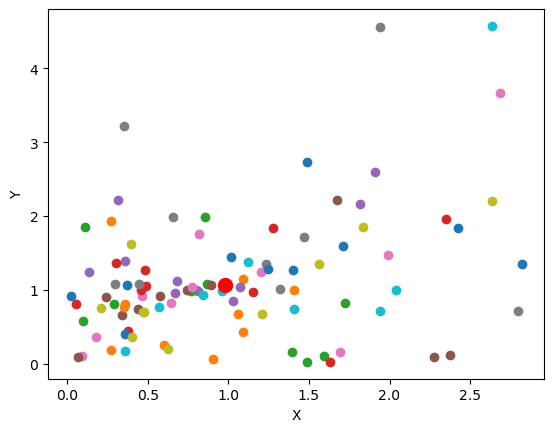

[(0.0, (0.368, 1.0697), 0.368),
 (0.0733, (0.29510000000000003, 1.0774), 0.368),
 (0.0746, (0.4423, 1.0766), 0.368),
 (0.114, (0.4597, 1.002), 0.368),
 (0.1217, (0.48919999999999997, 1.059), 0.368)]

In [5]:
p.knn_predict(testNode)

### Create More Vects

In [6]:
time_seen = node.vect('time_seen')
time_seen.set_up(list(df['duration']),False,True)

In [7]:
time_seen.pdf_from_mu(True)

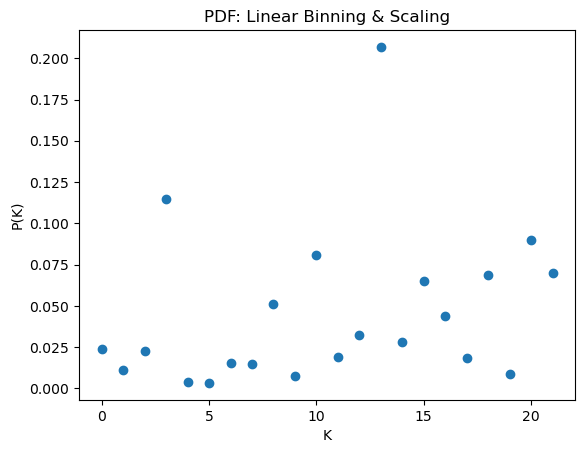

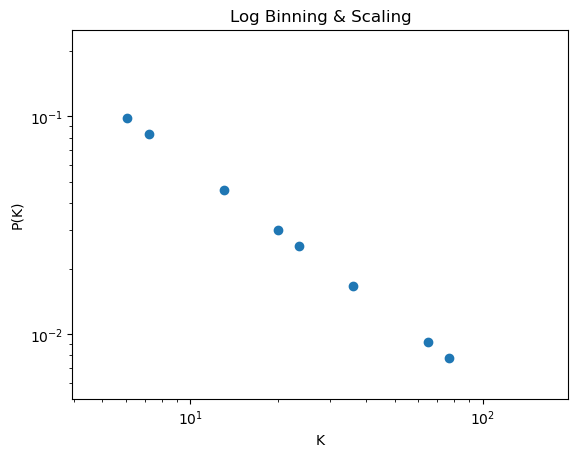

3.84


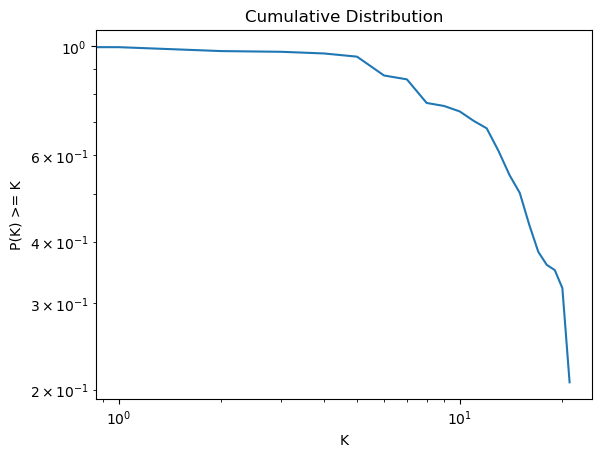

entropy: 3.84
variance: 15947509.368027031
vector_mu: 4005.681818181818
std: 3993.4332807782116


In [8]:
shapes.basic_stats(True)

### Linear Regression & Outlier Cleaning

m = 4.248484864437686 
b = 1272.851681841883


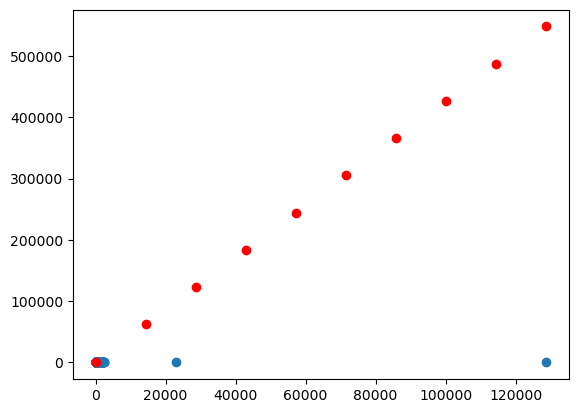

In [9]:
p1 = node.point(time_seen.vector,shapes.vector,'shape_duration') 
p1.linear_regression()
p2 = node.point(shapes.vector, state.vector,'shape_state') 
p3 = node.point(state.vector, time_seen.vector,'state_duration') 

m = 6.162938885663805 
b = 12.233228634619536


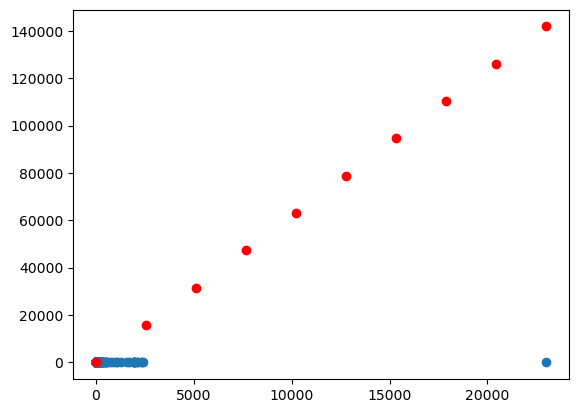

array([-4.93961602e+01,  1.57140320e+04,  3.14774601e+04,  4.72408882e+04,
        6.30043163e+04,  7.87677445e+04,  9.45311726e+04,  1.10294601e+05,
        1.26058029e+05,  1.41821457e+05])

In [10]:
p1.remove_extreme_outlier()
p1.linear_regression()

m = 6.20469981238349 
b = -44.60732473627877


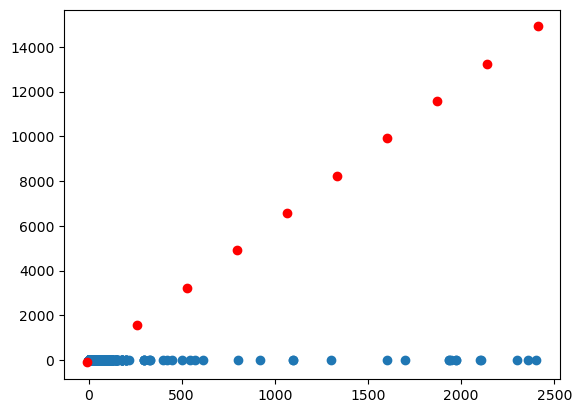

array([ -106.65432286,  1561.72051558,  3230.09535402,  4898.47019246,
        6566.8450309 ,  8235.21986934,  9903.59470779, 11571.96954623,
       13240.34438467, 14908.71922311])

In [11]:
p1.remove_extreme_outlier()
p1.linear_regression()

m = 1.9498229435660122 
b = -0.9498229435660122


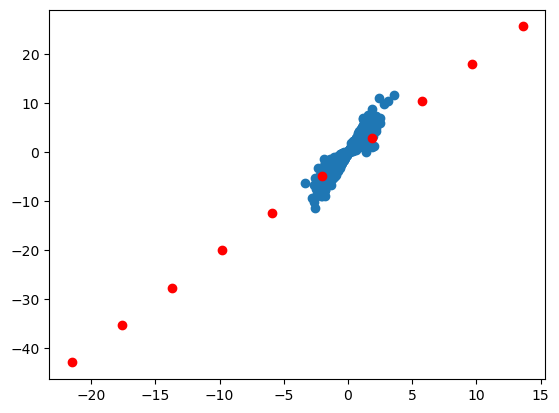

array([-42.93005322, -35.31957478, -27.70909634, -20.0986179 ,
       -12.48813946,  -4.87766103,   2.73281741,  10.34329585,
        17.95377429,  25.56425273])

In [12]:
x,y = shapes.create_corr_vectors(1000,3)
p2 = node.point(x,y,'corr_v') 
p2.linear_regression()

m = 1.9423445708179556 
b = -0.9423445708179556


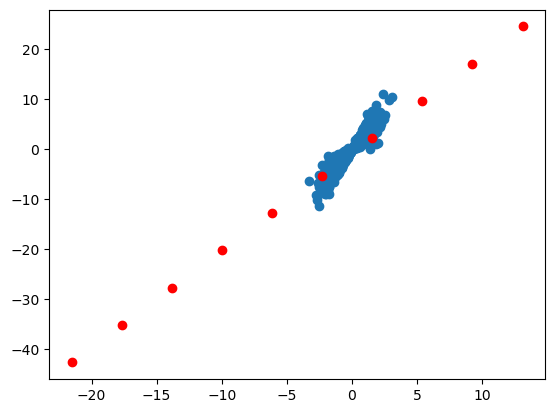

array([-42.7615634 , -35.28904185, -27.81652029, -20.34399873,
       -12.87147717,  -5.39895562,   2.07356594,   9.5460875 ,
        17.01860906,  24.49113061])

In [13]:
p2.remove_extreme_outlier()
p2.linear_regression()

In [14]:
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [0, 0, 1, 1]

p3 = node.LogisticR(X,y)

p3.logistic_regression_fit()


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5689544233202097
Cost after iteration 200: 0.5292841384023353
Cost after iteration 300: 0.4945516271692501
Cost after iteration 400: 0.4640724670419005
Cost after iteration 500: 0.43723818974593964
Cost after iteration 600: 0.41351969523834736
Cost after iteration 700: 0.3924637362281639
Cost after iteration 800: 0.37368577387218205
Cost after iteration 900: 0.356861419413576


In [15]:
p3.log_predict([[1, 2], [6, 7]])

array([0., 1.])

In [16]:
p3.y_pred

array([0.2465274 , 0.83573158])